In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
github_data_df = pd.read_csv('/content/drive/MyDrive/Sena_Project/Github_data.csv')
github_data_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [ ]:
github_data_df = github_data_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
github_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             1500 non-null   object 
 1   name              1500 non-null   object 
 2   user              1500 non-null   object 
 3   star              1500 non-null   object 
 4   fork              1500 non-null   object 
 5   watch             1500 non-null   object 
 6   issue             1500 non-null   object 
 7   pull_requests     1500 non-null   object 
 8   projects          1313 non-null   float64
 9   topic_tag         1500 non-null   object 
 10  discription_text  1480 non-null   object 
 11  discription_url   669 non-null    object 
 12  commits           1500 non-null   object 
 13  branches          1500 non-null   object 
 14  packages          1500 non-null   int64  
 15  releases          1500 non-null   int64  
 16  contributers      1500 non-null   object 


In [ ]:
github_df = github_data_df[['topic','name','user','star','fork','watch','issue','pull_requests','topic_tag','commits','contributers']]

In [ ]:
new_names = ['Topic','Repo_Name','User_Name','Star','Fork','Watch','Issues','Pull_Requests',
             'Topic_Tags','Commits','Contributors']
old_names = github_df.columns
github_df = github_df.rename(columns=dict(zip(old_names, new_names)))

In [ ]:
github_df.head(2)

,Topic,Repo_Name,User_Name,Star,Fork,Watch,Issues,Pull_Requests,Topic_Tags,Commits,Contributors
0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,"['deep-learning', 'tensorflow', 'neural-networ...","5,342",49
1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,"['machine-learning', 'python', 'statistics', '...","25,405",108


In [ ]:
github_df['Star'] = github_df['Star'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Fork'] = github_df['Fork'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Watch'] = github_df['Watch'].apply(lambda x: float(x.rstrip('k'))*1000 if 'k' in x else float(x))

In [ ]:
github_df.head(2)

,Topic,Repo_Name,User_Name,Star,Fork,Watch,Issues,Pull_Requests,Topic_Tags,Commits,Contributors
0,Data-Science,keras,keras-team,47900.0,18100.0,2100.0,"2,940",87,"['deep-learning', 'tensorflow', 'neural-networ...","5,342",49
1,Data-Science,scikit-learn,scikit-learn,40300.0,19600.0,2200.0,"1,505",764,"['machine-learning', 'python', 'statistics', '...","25,405",108


In [ ]:
github_df['Issues'] = github_df['Issues'].apply(lambda x: x.replace(',',''))
github_df['Commits'] = github_df['Commits'].apply(lambda x: x.replace(',',''))

In [ ]:
github_df.dtypes

Topic             object
Repo_Name         object
User_Name         object
Star             float64
Fork             float64
Watch            float64
Issues            object
Pull_Requests     object
Topic_Tags        object
Commits           object
Contributors      object
dtype: object

In [ ]:
cols = ['Issues','Pull_Requests','Commits','Contributors']
github_df[cols] = github_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
github_df.dtypes

Topic             object
Repo_Name         object
User_Name         object
Star             float64
Fork             float64
Watch            float64
Issues           float64
Pull_Requests    float64
Topic_Tags        object
Commits          float64
Contributors     float64
dtype: object

In [ ]:
github_df.describe()

,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1495.000000
mean,8058.556667,1845.994667,380.881333,116.228152,15.527685,2535.753333,28.657525
std,17031.342041,4572.215953,754.014969,344.511792,55.227818,21605.630660,79.740051
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,576.000000,109.000000,37.000000,2.000000,0.000000,50.000000,0.000000
50%,1800.000000,385.500000,108.000000,14.000000,2.000000,196.000000,0.000000
75%,9025.000000,1700.000000,416.000000,72.500000,9.000000,953.500000,20.000000
max,310000.000000,80900.000000,8400.000000,4337.000000,851.000000,797646.000000,877.000000


Analysis 1 : Top repositories based on popularity

In [ ]:
pop_mean_df = github_df.groupby('Topic').mean().reset_index()

In [ ]:
pop_mean_df

,Topic,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
0,Android-studio,121.43,39.42,10.07,7.120000,0.350000,113.66,3.900000
1,Arduino,1979.69,839.55,168.55,82.390000,12.210000,1083.87,21.410000
2,Computer-Vision,4925.00,1537.83,283.24,133.220000,14.150000,1462.67,10.270000
3,Data-Science,6669.00,2145.86,400.22,146.950000,20.620000,2732.74,29.561224
4,GAN,2440.45,668.75,122.66,41.120000,3.230000,425.29,9.850000
5,Open-CV,271.49,133.17,26.17,5.210000,2.150000,40.56,0.820000
6,Raspberry pi,1515.87,330.78,124.25,47.520000,4.750000,9041.52,29.410000
7,awesome,1653.00,279.10,113.20,14.200000,2.090000,205.36,0.940000
8,c++,19380.35,3656.02,874.50,234.800000,30.310000,6349.22,52.595960
9,flutter,3556.83,666.05,131.05,53.373737,4.920000,638.29,20.240000


Analysis of stars


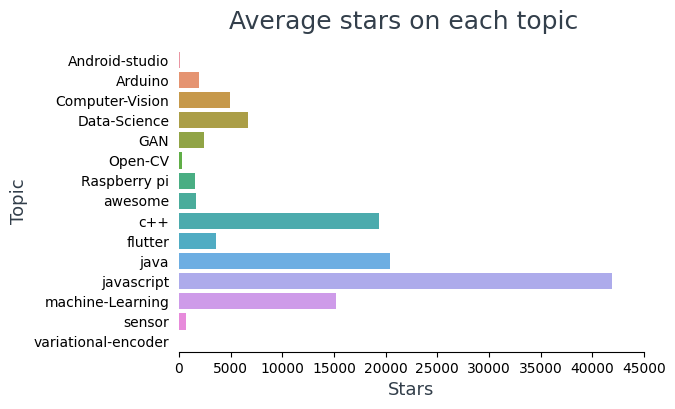

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,45000)
# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Star', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Stars', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average stars on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most starred repos
github_df.nlargest(n=10, columns='Star')[['Repo_Name','Topic','Star']]

,Repo_Name,Topic,Star
1000,freeCodeCamp,javascript,310000.0
1001,vue,javascript,163000.0
1002,react,javascript,147000.0
100,tensorflow,machine-Learning,144000.0
1003,bootstrap,javascript,140000.0
1004,You-Dont-Know-JS,javascript,120000.0
1100,coding-interview-university,c++,110000.0
800,CS-Notes,java,98400.0
1101,CS-Notes,c++,98400.0
801,javascript,java,94800.0


In [ ]:
print('Most starred repository:')
print('Repository Name: ',github_df.iloc[github_df['Star'].idxmax()]['Repo_Name'])
print('Topic: ',github_df.iloc[github_df['Star'].idxmax()]['Topic'])
print('Star: ',github_df.iloc[github_df['Star'].idxmax()]['Star'])


Most starred repository:
Repository Name:  freeCodeCamp
Topic:  javascript
Star:  310000.0


Analysis of Watch

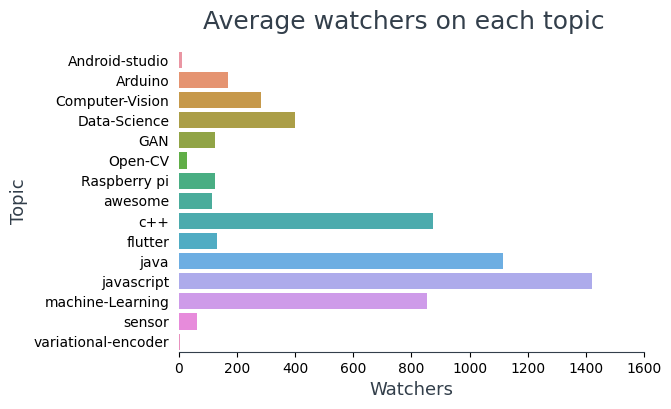

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,1600)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Watch', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Watchers', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average watchers on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most watched repos
github_df.nlargest(n=10, columns='Watch')[['Repo_Name','Topic','Watch']]

,Repo_Name,Topic,Watch
100,tensorflow,machine-Learning,8400.0
1000,freeCodeCamp,javascript,8400.0
1003,bootstrap,javascript,7200.0
1133,CodeHub,c++,6800.0
1002,react,javascript,6700.0
1001,vue,javascript,6100.0
1100,coding-interview-university,c++,5800.0
1010,free-programming-books-zh_CN,javascript,5500.0
1004,You-Dont-Know-JS,javascript,5400.0
800,CS-Notes,java,4800.0


In [ ]:
print('Most watched repository:')
print('Repository Name: ',github_df.iloc[github_df['Watch'].idxmax()]['Repo_Name'])
print('Topic: ',github_df.iloc[github_df['Watch'].idxmax()]['Topic'])
print('Watch: ',github_df.iloc[github_df['Watch'].idxmax()]['Watch'])


Most watched repository:
Repository Name:  tensorflow
Topic:  machine-Learning
Watch:  8400.0


Analysis of Fork

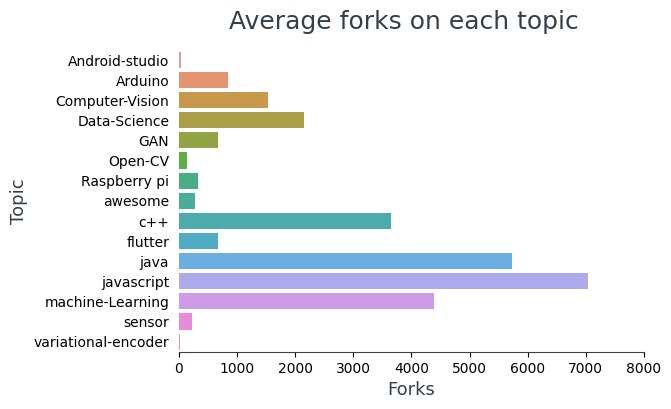

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,8000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Fork', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Forks', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average forks on each topic',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most forked repos
github_df.nlargest(n=10, columns='Fork')[['Repo_Name','Topic','Fork']]

,Repo_Name,Topic,Fork
100,tensorflow,machine-Learning,80900.0
1003,bootstrap,javascript,68700.0
300,opencv,Computer-Vision,34900.0
800,CS-Notes,java,32100.0
1100,coding-interview-university,c++,32100.0
1101,CS-Notes,c++,32100.0
806,spring-boot,java,29600.0
64,courses,Data-Science,28500.0
1002,react,javascript,28500.0
802,JavaGuide,java,26300.0


In [ ]:
print('Most forked repository:')
print('Repository Name: ',github_df.iloc[github_df['Fork'].idxmax()]['Repo_Name'])
print('Topic: ',github_df.iloc[github_df['Fork'].idxmax()]['Topic'])
print('Fork: ',github_df.iloc[github_df['Fork'].idxmax()]['Fork'])

Most forked repository:
Repository Name:  tensorflow
Topic:  machine-Learning
Fork:  80900.0


Relationship between Star, Fork and Watch

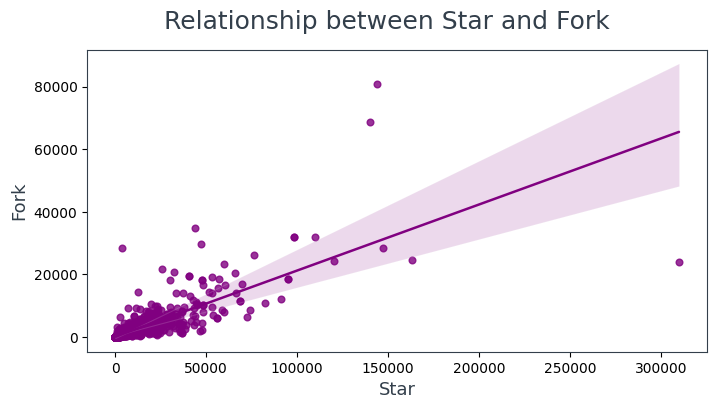

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Star', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Star', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relationship between Star and Fork',fontsize=18, color = '#333F4B');

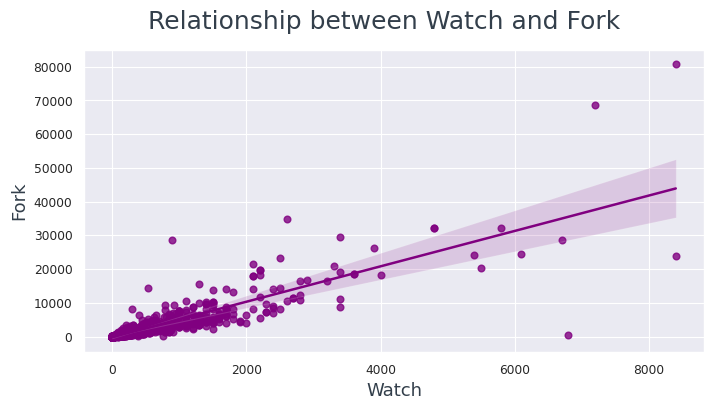

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Watch', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Watch', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relationship between Watch and Fork',fontsize=18, color = '#333F4B');

Analysis 2 : Contribution activities using issues, pull requests, commits, and contributors across the repositories

In [ ]:
# drop rows with any null values and create a dataframe with only the contribution columns
corr_df = github_df.dropna(axis=0, subset = ['Issues','Pull_Requests','Commits','Contributors'])[['Issues','Pull_Requests','Commits','Contributors']]

In [ ]:
# correlation between the contribution columns
corr_df.corr()

,Issues,Pull_Requests,Commits,Contributors
Issues,1.000000,0.657109,0.173512,0.394396
Pull_Requests,0.657109,1.000000,0.149034,0.296447
Commits,0.173512,0.149034,1.000000,0.149003
Contributors,0.394396,0.296447,0.149003,1.000000


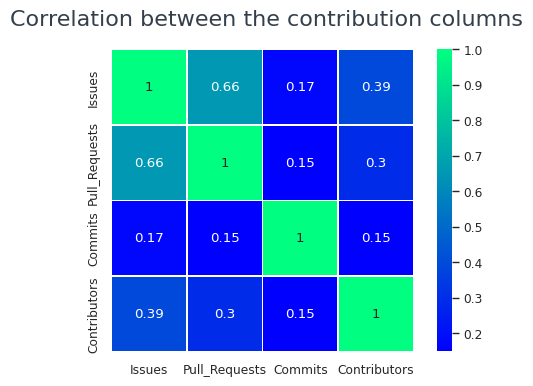

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(corr_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='winter');
fig.suptitle('Correlation between the contribution columns',fontsize=16, color = '#333F4B');

In [ ]:
popular_df = github_df.nlargest(n=100,columns=['Star'])[['Issues','Pull_Requests','Commits','Contributors']]

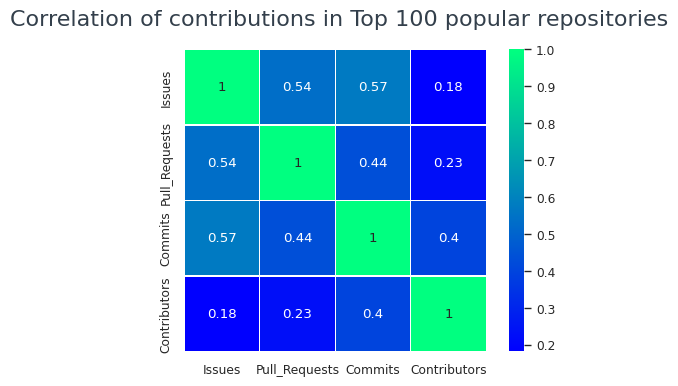

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(popular_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='winter');
fig.suptitle('Correlation of contributions in Top 100 popular repositories',fontsize=16, color = '#333F4B');

In [ ]:
# create a list of top 10 users with more repositories
users_with_more_repos = github_df.groupby('User_Name').size().nlargest(n=10).reset_index(name='Count')['User_Name'].to_list()

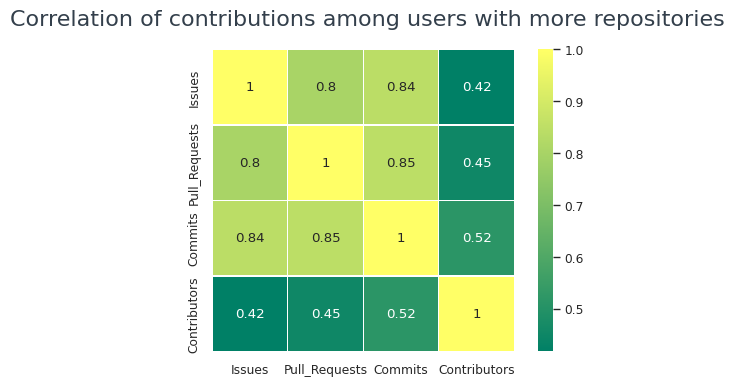

In [ ]:
# create a dataframe using users_with_more_repos list
more_repos_users_df = github_df[github_df['User_Name'].isin(users_with_more_repos)][['Issues','Pull_Requests','Commits','Contributors']]

# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(more_repos_users_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlation of contributions among users with more repositories',fontsize=16, color = '#333F4B');

Analysis 3 : Topic Tags

In [ ]:
# let's look at the topic_tags column
github_df['Topic_Tags'].head()

0    ['deep-learning', 'tensorflow', 'neural-networ...
1    ['machine-learning', 'python', 'statistics', '...
2    ['scikit-learn', 'numpy', 'python', 'jupyter-n...
3    ['bayesian-methods', 'pymc', 'mathematical-ana...
4                                                   []
Name: Topic_Tags, dtype: object

In [ ]:
import ast
from collections import Counter

# convert column to list of lists
topic_tags = github_df['Topic_Tags'].apply(lambda x: ast.literal_eval(x)).tolist()

# split all lists and select individual items
all_tags = [tag for topic in topic_tags for tag in topic]

# count the occurrence of each tag
tags_dict = Counter(all_tags)

In [ ]:
# create a dataframe with most tags
toptags_df = pd.DataFrame(tags_dict.most_common(15), columns=['Name of the Tag','Count'])

In [ ]:
toptags_df

,Name of the Tag,Count
0,machine-learning,236
1,deep-learning,214
2,python,149
3,computer-vision,127
4,javascript,123
5,data-science,110
6,java,109
7,android,100
8,tensorflow,92
9,flutter,75


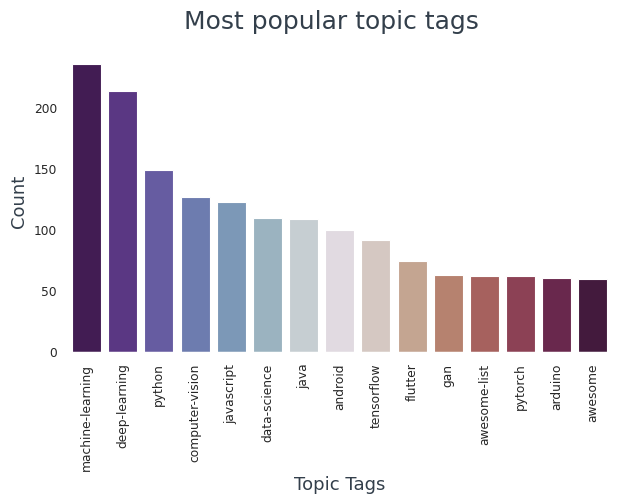

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# rotate the labels along x-axis
plt.xticks(rotation=90)

ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=toptags_df, x='Name of the Tag', y='Count', palette='twilight_shifted');

# set x and y-axis labels and title
ax.set_xlabel('Topic Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Count', fontsize=13, color = '#333F4B')
fig.suptitle('Most popular topic tags',fontsize=18, color = '#333F4B');

In [ ]:
# len of tags list in each column
len_tags = [len(tag) for tag in topic_tags]

# create a new column -> total_tags
github_df['Total_Tags'] = len_tags

# group based on topic and calculate total_tags in each topic
topic_wise_tags = github_df.groupby('Topic').sum()['Total_Tags'].reset_index(name='Total Tags')

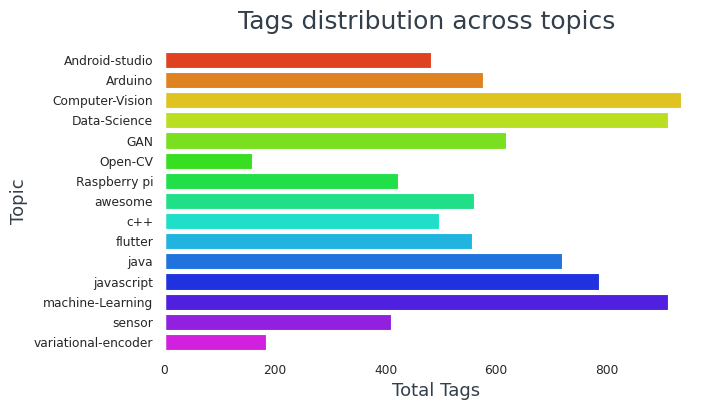

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# remove background grids
ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=topic_wise_tags,x='Total Tags', y='Topic', ci=None, palette='gist_rainbow');

# set x and y-axis labels and title
ax.set_xlabel('Total Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Tags distribution across topics',fontsize=18, color = '#333F4B');